# Analysing flavored natas sold based on multiple factors
by Smahi

## Scope
- Filter out flavoured natas from the dataset.
- Find out which flavored nata was sold the most.
- Which day most flavored natas was sold.
- Which week most flavored natas were sold, which particular nata was sold the most that week.
- Find the day of the week with the highest total sold for each flavored nata.

## Summary
- **89** Flaored natas were sold on **24 Sep 2023**, which is the highest of the month.
- **Week 39**is when the most flavored natas were sold.
- This is the distribution of weekly sales
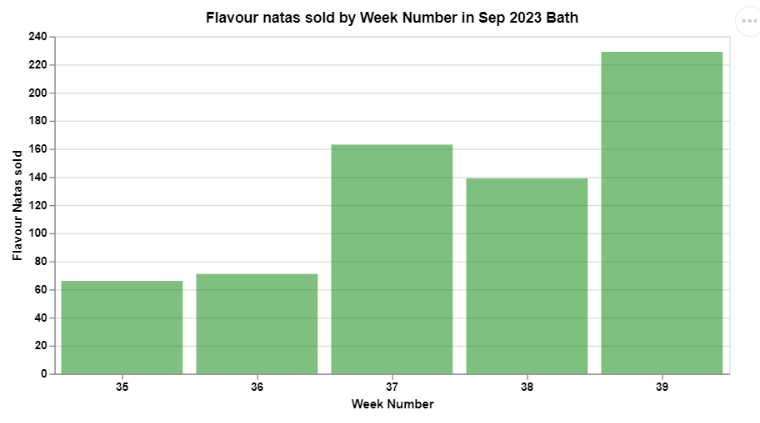
- **32** Nutella natas were sold in week 39, which is the highest sale among flavored nata in a day.
- **Saturdays**are when most flavored natas are sold, below is the plot confirming that.
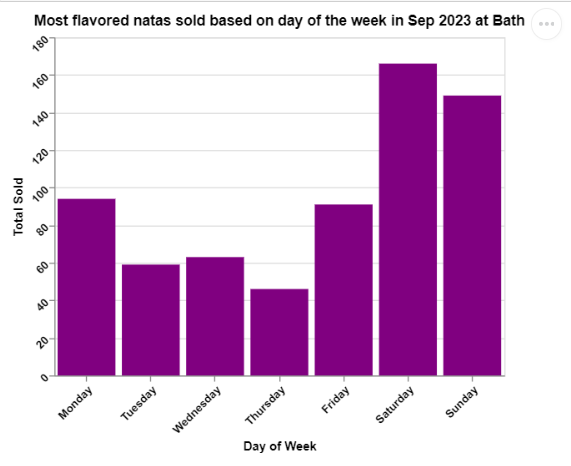
- In a month most sold flavor is **Nutella**, followed by **Biscoff**
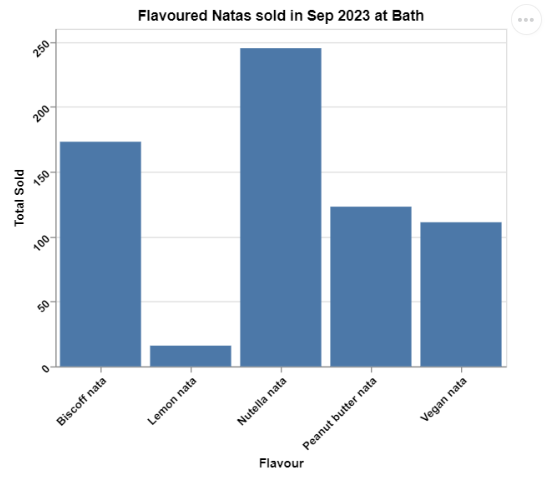
- Popular day for each category of flavored nata
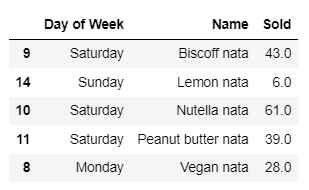
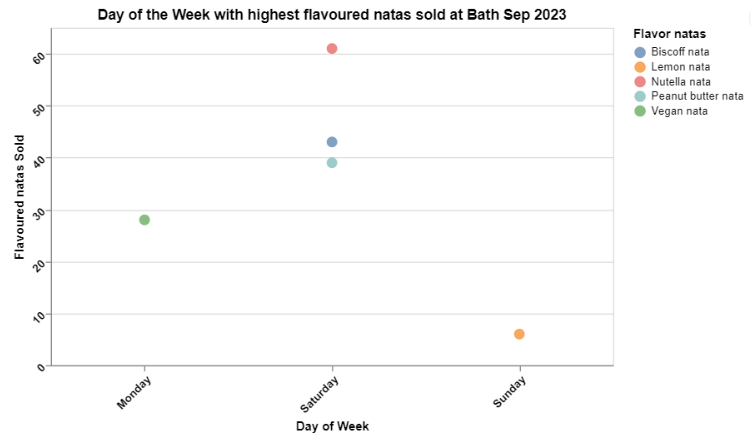

## Imports

In [1]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

In [2]:
# Read file
df = pd.read_excel('output.xlsx')

In [3]:
# Fill null values
df.fillna('',inplace=True)

In [4]:
# Preview
df.head()

,Date,Category Name,Name,Gross Sales,Net Sales,Sold,Refunded,Modifier Name,Modifier Sold,Modifier Amount,Discounts,Refunds,% Net Sales,Avg Item Size,COGS,Gross Profit,Repayments,Day of Week,Week Number
0,2023-09-01,Pasteis de nata,,,,,,,,,,,,,,,,Friday,35
1,2023-09-01,,Pastel de Nata,582.2,457.28,284.0,0.0,,,,-124.92,0.0,40.4,1.61,136.32,320.96,,Friday,35
2,2023-09-01,Total (Pasteis de nata),,582.2,457.28,284.0,0.0,-,,0.0,-124.92,0.0,40.4,1.61,136.32,320.96,,Friday,35
3,2023-09-01,Coffee Deal,,,,,,,,,,,,,,,,Friday,35
4,2023-09-01,,Coffee & Pastel de Nata,196.8,196.8,48.0,0.0,,,,0.0,0.0,17.39,4.1,0.0,196.8,,Friday,35


In [5]:
# Filter out total flavor natas
flavor = df[df['Category Name']=='Total (Flavour Natas)']

In [6]:
# Check size
flavor.shape

(30, 19)

In [7]:
# Preview
flavor.head()

,Date,Category Name,Name,Gross Sales,Net Sales,Sold,Refunded,Modifier Name,Modifier Sold,Modifier Amount,Discounts,Refunds,% Net Sales,Avg Item Size,COGS,Gross Profit,Repayments,Day of Week,Week Number
51,2023-09-01,Total (Flavour Natas),,94.05,76.92,33.0,0.0,-,,0.0,-17.13,0.0,6.8,2.33,11.04,65.88,,Friday,35
148,2023-09-02,Total (Flavour Natas),,94.05,78.05,33.0,0.0,-,,0.0,-16.0,0.0,5.17,2.37,15.84,62.21,,Saturday,35
272,2023-09-03,Total (Flavour Natas),,54.15,45.67,19.0,0.0,-,,0.0,-8.48,0.0,4.62,2.4,9.12,36.54,,Sunday,36
344,2023-09-04,Total (Flavour Natas),,42.75,34.19,15.0,0.0,-,,0.0,-8.56,0.0,5.78,2.28,7.2,26.99,,Monday,36
436,2023-09-05,Total (Flavour Natas),,5.7,5.41,2.0,0.0,-,,0.0,-0.29,0.0,0.83,2.71,0.96,4.45,0.0,Tuesday,36


## Which day most flavor natas were sold

In [8]:
# Find the maximum "Sold" value
max_sold_value = flavor['Sold'].max()

# Filter the DataFrame to get the row(s) with the maximum "Modifier Sold" value
rows_with_max_sold = flavor[flavor['Sold'] == max_sold_value]

In [9]:
rows_with_max_sold

,Date,Category Name,Name,Gross Sales,Net Sales,Sold,Refunded,Modifier Name,Modifier Sold,Modifier Amount,Discounts,Refunds,% Net Sales,Avg Item Size,COGS,Gross Profit,Repayments,Day of Week,Week Number
1983,2023-09-24,Total (Flavour Natas),,253.65,217.11,89.0,0.0,-,,0.0,-36.54,0.0,18.45,2.44,34.08,183.04,,Sunday,39


## Which week most flavored natas were sold

In [10]:
# Find week wise sales distribution
flavor_week = flavor.groupby(['Week Number','Category Name'])['Sold'].sum().reset_index()

In [11]:
flavor_week

,Week Number,Category Name,Sold
0,35,Total (Flavour Natas),66.0
1,36,Total (Flavour Natas),71.0
2,37,Total (Flavour Natas),163.0
3,38,Total (Flavour Natas),139.0
4,39,Total (Flavour Natas),229.0


In [12]:
# Visualise the weekly sales
flavor_week_chart = alt.Chart(flavor_week).mark_bar(color='green',opacity=0.5).encode(
    x=alt.X('Week Number:N', axis=alt.Axis(labelFontWeight='bold',labelAngle=0)),
    y=alt.Y('Sold:Q', title = 'Flavour Natas sold',axis = alt.Axis(labelFontWeight='bold')),
    tooltip=['Week Number:N', 'Sold:Q']
).properties(
    width=600,
    title='Flavour natas sold by Week Number in Sep 2023 Bath'
)

In [13]:
flavor_week_chart

alt.Chart(...)

In [14]:
# Filter out the flavored natas
values_to_filter = ['Vegan nata',
'Biscoff nata',
'Nutella nata',
'Peanut butter nata',
'Lemon nata']


In [15]:
flavor_df = df[df['Name'].isin(values_to_filter)]

In [16]:
# Check size
flavor_df.shape

(109, 19)

In [17]:
# Preview
flavor_df.head()

,Date,Category Name,Name,Gross Sales,Net Sales,Sold,Refunded,Modifier Name,Modifier Sold,Modifier Amount,Discounts,Refunds,% Net Sales,Avg Item Size,COGS,Gross Profit,Repayments,Day of Week,Week Number
46,2023-09-01,,Vegan nata,28.5,25.63,10.0,0.0,,,,-2.87,0.0,2.26,2.56,0.0,25.63,,Friday,35
47,2023-09-01,,Biscoff nata,25.65,22.8,9.0,0.0,,,,-2.85,0.0,2.01,2.53,4.32,18.48,,Friday,35
48,2023-09-01,,Nutella nata,14.25,10.26,5.0,0.0,,,,-3.99,0.0,0.91,2.05,2.4,7.86,,Friday,35
49,2023-09-01,,Peanut butter nata,11.4,9.97,4.0,0.0,,,,-1.43,0.0,0.88,2.49,1.92,8.05,,Friday,35
50,2023-09-01,,Lemon nata,14.25,8.26,5.0,0.0,,,,-5.99,0.0,0.73,1.65,2.4,5.86,,Friday,35


In [18]:
# Get the highest sold flavored nata in a day
flavor_df.sort_values(by='Sold',ascending=False).iloc[0]

Date               2023-09-24 00:00:00
Category Name                         
Name                      Nutella nata
Gross Sales                       91.2
Net Sales                        76.36
Sold                              32.0
Refunded                           0.0
Modifier Name                         
Modifier Sold                         
Modifier Amount                       
Discounts                       -14.84
Refunds                            0.0
% Net Sales                       6.49
Avg Item Size                     2.39
COGS                             15.36
Gross Profit                      61.0
Repayments                            
Day of Week                     Sunday
Week Number                         39
Name: 1978, dtype: object

In [19]:
# Filter the data for week 39
week_39_data = flavor_df[flavor_df['Week Number'] == 39]

In [20]:
week_39_data

,Date,Category Name,Name,Gross Sales,Net Sales,Sold,Refunded,Modifier Name,Modifier Sold,Modifier Amount,Discounts,Refunds,% Net Sales,Avg Item Size,COGS,Gross Profit,Repayments,Day of Week,Week Number
1978,2023-09-24,,Nutella nata,91.2,76.36,32.0,0.0,,,,-14.84,0.0,6.49,2.39,15.36,61.0,,Sunday,39
1979,2023-09-24,,Vegan nata,51.3,47.29,18.0,0.0,,,,-4.01,0.0,4.02,2.63,0.0,47.29,,Sunday,39
1980,2023-09-24,,Biscoff nata,48.45,40.18,17.0,0.0,,,,-8.27,0.0,3.41,2.36,8.16,32.02,,Sunday,39
1981,2023-09-24,,Peanut butter nata,45.6,39.61,16.0,0.0,,,,-5.99,0.0,3.37,2.48,7.68,31.93,,Sunday,39
1982,2023-09-24,,Lemon nata,17.1,13.68,6.0,0.0,,,,-3.42,0.0,1.16,2.28,2.88,10.8,,Sunday,39
2080,2023-09-25,,Nutella nata,48.45,41.57,17.0,0.0,,,,-6.88,0.0,4.51,2.45,8.16,33.41,,Monday,39
2081,2023-09-25,,Vegan nata,31.35,27.07,11.0,0.0,,,,-4.28,0.0,2.93,2.46,0.0,27.07,,Monday,39
2082,2023-09-25,,Peanut butter nata,17.1,13.96,6.0,0.0,,,,-3.14,0.0,1.51,2.33,2.88,11.08,,Monday,39
2083,2023-09-25,,Biscoff nata,11.4,9.97,4.0,0.0,,,,-1.43,0.0,1.08,2.49,1.92,8.05,,Monday,39
2173,2023-09-26,,Biscoff nata,19.95,19.09,7.0,0.0,,,,-0.86,0.0,3.3,2.73,3.36,15.73,,Tuesday,39


In [21]:
# Find the flavor nata with the highest sales in week 39
most_sold_flnatas = week_39_data.sort_values(by='Sold', ascending=False).iloc[0]

In [22]:
most_sold_flnatas

Date               2023-09-24 00:00:00
Category Name                         
Name                      Nutella nata
Gross Sales                       91.2
Net Sales                        76.36
Sold                              32.0
Refunded                           0.0
Modifier Name                         
Modifier Sold                         
Modifier Amount                       
Discounts                       -14.84
Refunds                            0.0
% Net Sales                       6.49
Avg Item Size                     2.39
COGS                             15.36
Gross Profit                      61.0
Repayments                            
Day of Week                     Sunday
Week Number                         39
Name: 1978, dtype: object

## Which day of the week most flavoured natas were sold

In [23]:
# Get the sales for flavored natas by day of the week
flavor_day = flavor_df.groupby('Day of Week')['Sold'].sum().reset_index()

In [24]:
# Sort it
flavor_day = flavor_day.sort_values(by='Sold', ascending=False)

In [25]:
flavor_day

,Day of Week,Sold
2,Saturday,166.0
3,Sunday,149.0
1,Monday,94.0
0,Friday,91.0
6,Wednesday,63.0
5,Tuesday,59.0
4,Thursday,46.0


In [26]:
# Visualise the above table
day_chart = alt.Chart(flavor_day).mark_bar(color='purple').encode(
    x=alt.X('Day of Week:N', title='Day of Week',axis=alt.Axis(labelFontWeight='bold',labelAngle=-45),
           sort=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']),
    y=alt.Y('Sold:Q', title='Total Sold',axis=alt.Axis(labelFontWeight='bold',labelAngle=-45)),
    tooltip=['Day of Week', 'Sold']
).properties(
    width = 400,
    title='Most flavored natas sold based on day of the week in Sep 2023 at Bath'
)

In [27]:
day_chart

alt.Chart(...)

In [28]:
# Get the sales of each type of flavor nata
flavory_type = flavor_df.groupby('Name')['Sold'].sum().reset_index()

In [29]:
# Sort it
flavory_type = flavory_type.sort_values(by='Sold', ascending=False)

In [30]:
flavory_type

,Name,Sold
2,Nutella nata,245.0
0,Biscoff nata,173.0
3,Peanut butter nata,123.0
4,Vegan nata,111.0
1,Lemon nata,16.0


In [31]:
# Visualise the above table
chart = alt.Chart(flavory_type).mark_bar().encode(
    x=alt.X('Name:N', title='Flavour',axis=alt.Axis(labelFontWeight='bold',labelAngle=-45)),
    y=alt.Y('Sold:Q', title='Total Sold',axis=alt.Axis(labelFontWeight='bold',labelAngle=-45)),
    color=alt.Color('Name:N', scale=alt.Scale(scheme='category20'), legend=None),
    tooltip=['Name', 'Sold']
).properties(
    width = 400,
    title='Flavoured Natas sold in Sep 2023 at Bath'
)

In [32]:
chart

alt.Chart(...)

## Which day of the week most flavored natas are sold

In [33]:
# Group the different type of flavored nata by different day of the week
grouped_data = flavor_df.groupby(['Day of Week', 'Name'])['Sold'].sum().reset_index()

In [34]:
grouped_data

,Day of Week,Name,Sold
0,Friday,Biscoff nata,26.0
1,Friday,Lemon nata,5.0
2,Friday,Nutella nata,26.0
3,Friday,Peanut butter nata,16.0
4,Friday,Vegan nata,18.0
5,Monday,Biscoff nata,13.0
6,Monday,Nutella nata,42.0
7,Monday,Peanut butter nata,11.0
8,Monday,Vegan nata,28.0
9,Saturday,Biscoff nata,43.0


In [35]:
# Find the day of the week with the highest total sold for each modifier
max_sold_by_modifier = grouped_data.groupby('Name')['Sold'].idxmax()

In [36]:
max_sold_by_modifier

Name
Biscoff nata           9
Lemon nata            14
Nutella nata          10
Peanut butter nata    11
Vegan nata             8
Name: Sold, dtype: int64

In [37]:
# Filter the grouped data to get the day of the week with the highest sales for each modifier
best_days = grouped_data.loc[max_sold_by_modifier]

In [38]:
best_days

,Day of Week,Name,Sold
9,Saturday,Biscoff nata,43.0
14,Sunday,Lemon nata,6.0
10,Saturday,Nutella nata,61.0
11,Saturday,Peanut butter nata,39.0
8,Monday,Vegan nata,28.0


In [39]:
# Create a scatter plot using Altair
chart = alt.Chart(best_days).mark_circle(size=90).encode(
    x=alt.X('Day of Week:N', title='Day of Week',axis=alt.Axis(labelFontWeight='bold',labelAngle=-45)),
    y=alt.Y('Sold:Q', title='Flavoured natas Sold',axis=alt.Axis(labelFontWeight='bold',labelAngle=-45)),
    color=alt.Color('Name:N', title='Flavor natas'),
    tooltip=['Day of Week', 'Name', 'Sold']
).properties(
    width = 500,
    title='Day of the Week with highest flavoured natas sold at Bath Sep 2023'
)

# Show the chart
chart

alt.Chart(...)